Train the four models

In [1]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3, MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


train_dir = './train'
validation_dir = './validation'
test_dir = './test'


datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    width_shift_range=0.05,
    height_shift_range=0.05,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary')


def build_model(base_model):
    model = Sequential()
    model.add(base_model)
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])
    return model

models = {
    'ResNet50': ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'VGG16': VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'InceptionV3': InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3)),
    'MobileNetV2': MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
}

train_histories = {}

for name, base_model in models.items():
    print(f"Training with {name}")
    model = build_model(base_model)
    history = model.fit(train_generator, validation_data=validation_generator, epochs=10)
    train_histories[name] = history
    model.save(f'{name}_model.h5')


2023-12-14 02:18:00.012351: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-14 02:18:00.064703: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 02:18:00.888567: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 3323 images belonging to 2 classes.
Found 710 images belonging to 2 classes.


2023-12-14 02:18:01.904758: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-14 02:18:01.919196: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-14 02:18:01.919446: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Training with ResNet50


Epoch 1/10


2023-12-14 02:18:18.961354: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-12-14 02:18:20.275501: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1cb875c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-14 02:18:20.275602: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-16GB, Compute Capability 7.0
2023-12-14 02:18:20.288122: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-14 02:18:20.474019: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


104/104 [==============================] - 68s 357ms/step - loss: 2.1707 - accuracy: 0.5248 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 2/10
104/104 [==============================] - 35s 331ms/step - loss: 1.0351 - accuracy: 0.5293 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 3/10
104/104 [==============================] - 35s 331ms/step - loss: 0.9029 - accuracy: 0.5287 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 4/10
104/104 [==============================] - 33s 319ms/step - loss: 0.8344 - accuracy: 0.5317 - val_loss: 0.6930 - val_accuracy: 0.5070
Epoch 5/10
104/104 [==============================] - 35s 329ms/step - loss: 0.7641 - accuracy: 0.5317 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 6/10
104/104 [==============================] - 35s 338ms/step - loss: 0.8448 - accuracy: 0.5263 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 7/10
104/104 [==============================] - 34s 326ms/step - loss: 0.7506 - accuracy: 0.5339 - val_loss: 0.6931 - val_accuracy: 0.5

/environment/miniconda3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Training with VGG16
Epoch 1/10
104/104 [==============================] - 44s 360ms/step - loss: 0.8732 - accuracy: 0.5068 - val_loss: 0.7003 - val_accuracy: 0.5070
Epoch 2/10
104/104 [==============================] - 36s 345ms/step - loss: 0.7011 - accuracy: 0.5086 - val_loss: 0.6958 - val_accuracy: 0.5070
Epoch 3/10
104/104 [==============================] - 35s 338ms/step - loss: 0.6945 - accuracy: 0.5119 - val_loss: 0.6939 - val_accuracy: 0.4930
Epoch 4/10
104/104 [==============================] - 35s 335ms/step - loss: 0.6946 - accuracy: 0.5083 - val_loss: 0.6930 - val_accuracy: 0.5070
Epoch 5/10
104/104 [==============================] - 34s 325ms/step - loss: 0.6933 - accuracy: 0.4980 - val_loss: 0.6932 - val_accuracy: 0.4930
Epoch 6/10
104/104 [==============================] - 33s 314ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6931 - val_accuracy: 0.5070
Epoch 7/10
104/104 [==============================] - 34s 326ms/step - loss: 0.6931 - accuracy: 0.5071 - val_l

Epoch 1/10
104/104 [==============================] - 63s 358ms/step - loss: 0.9682 - accuracy: 0.5796 - val_loss: 31855.5410 - val_accuracy: 0.5070
Epoch 2/10
104/104 [==============================] - 35s 331ms/step - loss: 0.5987 - accuracy: 0.7307 - val_loss: 0.7415 - val_accuracy: 0.6042
Epoch 3/10
104/104 [==============================] - 34s 327ms/step - loss: 0.6372 - accuracy: 0.7571 - val_loss: 1.6190 - val_accuracy: 0.5577
Epoch 4/10
104/104 [==============================] - 35s 332ms/step - loss: 0.5190 - accuracy: 0.7993 - val_loss: 1.5180 - val_accuracy: 0.5465
Epoch 5/10
104/104 [==============================] - 34s 324ms/step - loss: 0.4273 - accuracy: 0.8516 - val_loss: 169.9324 - val_accuracy: 0.5099
Epoch 6/10
104/104 [==============================] - 35s 335ms/step - loss: 0.3003 - accuracy: 0.8971 - val_loss: 406.0359 - val_accuracy: 0.4859
Epoch 7/10
104/104 [==============================] - 35s 331ms/step - loss: 0.3614 - accuracy: 0.8562 - val_loss: 136.908

Epoch 1/10
104/104 [==============================] - 58s 331ms/step - loss: 1.0563 - accuracy: 0.6864 - val_loss: 19.3890 - val_accuracy: 0.4930
Epoch 2/10
104/104 [==============================] - 34s 322ms/step - loss: 0.6499 - accuracy: 0.7346 - val_loss: 31.1952 - val_accuracy: 0.4930
Epoch 3/10
104/104 [==============================] - 35s 339ms/step - loss: 0.6615 - accuracy: 0.7316 - val_loss: 6.7901 - val_accuracy: 0.5380
Epoch 4/10
104/104 [==============================] - 35s 334ms/step - loss: 0.6835 - accuracy: 0.7617 - val_loss: 12.7473 - val_accuracy: 0.4930
Epoch 5/10
104/104 [==============================] - 34s 328ms/step - loss: 0.5694 - accuracy: 0.7975 - val_loss: 7.2061 - val_accuracy: 0.4930
Epoch 6/10
104/104 [==============================] - 35s 331ms/step - loss: 0.6079 - accuracy: 0.7833 - val_loss: 3.0739 - val_accuracy: 0.5394
Epoch 7/10
104/104 [==============================] - 32s 311ms/step - loss: 0.5650 - accuracy: 0.7662 - val_loss: 5.5964 - val

In [ ]:
import matplotlib.pyplot as plt

loss_values = {}
acc_values = {}

for model_name in train_histories:
    history = train_histories[model_name].history
    loss_values[model_name] = history['loss']
    acc_values[model_name] = history['accuracy']


plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
for model_name in loss_values:
    plt.plot(loss_values[model_name], label=model_name)
plt.title('Training Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()


plt.subplot(1, 2, 2)
for model_name in acc_values:
    plt.plot(acc_values[model_name], label=model_name)
plt.title('Training Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()



Found 99 images belonging to 2 classes.
4/4 [==============================] - 4s 603ms/step - loss: 0.6648 - accuracy: 0.7374
模型 ResNet50 在测试集上的准确度: 0.74
4/4 [==============================] - 3s 641ms/step - loss: 0.6888 - accuracy: 0.7374
模型 VGG16 在测试集上的准确度: 0.74
4/4 [==============================] - 4s 667ms/step - loss: 185.0092 - accuracy: 0.5556
模型 InceptionV3 在测试集上的准确度: 0.56
4/4 [==============================] - 3s 591ms/step - loss: 4.3439 - accuracy: 0.5960
模型 MobileNetV2 在测试集上的准确度: 0.60


/environment/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20934 (\N{CJK UNIFIED IDEOGRAPH-51C6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 19981 (\N{CJK UNIFIED IDEOGRAPH-4E0D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/environment/miniconda3/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21516 (\N{CJK UNIFIED IDEOGRAPH-540C}) missing f

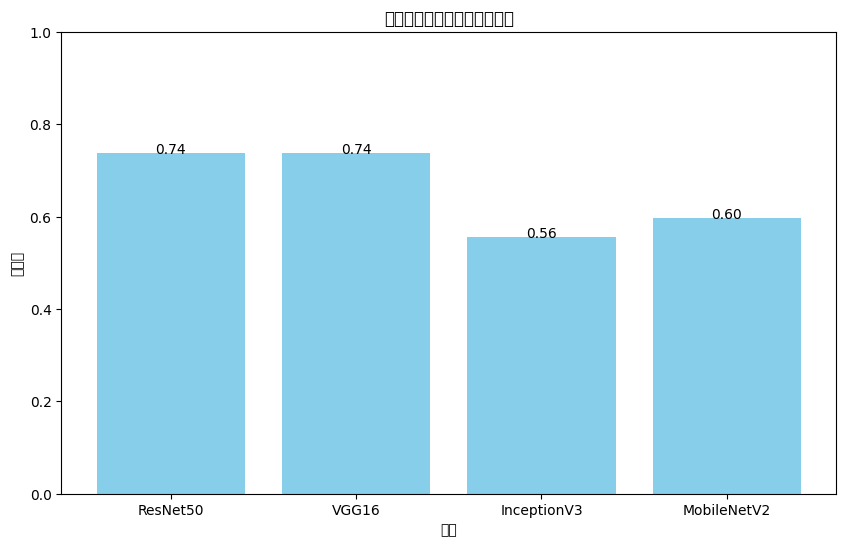

In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50, VGG16, InceptionV3, MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

train_dir = './train'
validation_dir = './validation'
test_dir = './test'

test_datagen = ImageDataGenerator(rescale=1.0/255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model_names = ['ResNet50', 'VGG16', 'InceptionV3', 'MobileNetV2']

accuracies = []
for model_name in model_names:
    model = load_model(f'{model_name}_model.h5')
    loss, accuracy = model.evaluate(test_generator)
    accuracies.append(accuracy)
    print(f'Model {model_name} Accuracy on Test Set: {accuracy:.2f}')

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracies, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models on the Test Set')
plt.ylim([0, 1])
for i in range(len(accuracies)):
    plt.text(i, accuracies[i], f'{accuracies[i]:.2f}', ha='center')

plt.show()


In [ ]:
import csv
histories_dir = './model_histories'
if not os.path.exists(histories_dir):
    os.makedirs(histories_dir)

for name, history in train_histories.items():
    history_path = os.path.join(histories_dir, f'{name}_history.csv')
    with open(history_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['epoch', 'loss', 'accuracy', 'val_loss', 'val_accuracy'])
        
        for i in range(len(history.history['loss'])):
            writer.writerow([i, 
                             history.history['loss'][i], 
                             history.history['accuracy'][i], 
                             history.history['val_loss'][i], 
                             history.history['val_accuracy'][i]])

In [5]:
import os
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


models_path = '/home/featurize/data/pretrain/'
data_path = '/home/featurize/data/pretrain/test'

models = ['InceptionV3_model.h5', 'MobileNetV2_model.h5', 'ResNet50_model.h5', 'VGG16_model.h5']


# test_datagen = ImageDataGenerator(rescale=1./255)
# test_generator = test_datagen.flow_from_directory(
#     data_path,
#     target_size=(image_size, image_size), 
#     batch_size=batch_size,
#     class_mode='binary',  # 或者 'categorical'，
#     shuffle=False)


def evaluate_model(model_path, test_generator):
    model = load_model(model_path, compile=False)
    

    predictions = model.predict(test_generator)
    y_pred = [1 if x > 0.5 else 0 for x in predictions]  
    y_true = test_generator.classes
    

    report = classification_report(y_true, y_pred, output_dict=True)
    roc_auc = roc_auc_score(y_true, predictions)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    specificity = tn / (tn+fp)

    print(f"Results for {os.path.basename(model_path)}:")
    print(f"Precision: {report['1']['precision']}")
    print(f"Accuracy: {report['accuracy']}")
    print(f"Recall: {report['1']['recall']}")
    print(f"F1: {report['1']['f1-score']}")
    print(f"Specificity: {specificity}")
    print(f"ROC-AUC: {roc_auc}")
    print("Confusion Matrix:")
    print(f"TN: {tn}, FP: {fp}, FN: {fn}, TP: {tp}")
    print("\n")


for model_name in models:
    model_path = os.path.join(models_path, model_name)
    evaluate_model(model_path, test_generator)


4/4 [==============================] - 4s 631ms/step
Results for InceptionV3_model.h5:
Precision: 0.36363636363636365
Accuracy: 0.5555555555555556
Recall: 0.9230769230769231
F1: 0.5217391304347827
Specificity: 0.4246575342465753
ROC-AUC: 0.6122233930453109
Confusion Matrix:
TN: 31, FP: 42, FN: 2, TP: 24


4/4 [==============================] - 3s 540ms/step
Results for MobileNetV2_model.h5:
Precision: 0.37037037037037035
Accuracy: 0.5959595959595959
Recall: 0.7692307692307693
F1: 0.5
Specificity: 0.5342465753424658
ROC-AUC: 0.696259220231823
Confusion Matrix:
TN: 39, FP: 34, FN: 6, TP: 20


4/4 [==============================] - 3s 573ms/step
Results for ResNet50_model.h5:
Precision: 0.0
Accuracy: 0.7373737373737373
Recall: 0.0
F1: 0.0
Specificity: 1.0
ROC-AUC: 0.5152792413066385
Confusion Matrix:
TN: 73, FP: 0, FN: 26, TP: 0




/environment/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/environment/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/environment/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


4/4 [==============================] - 3s 522ms/step
Results for VGG16_model.h5:
Precision: 0.0
Accuracy: 0.7373737373737373
Recall: 0.0
F1: 0.0
Specificity: 1.0
ROC-AUC: 0.5
Confusion Matrix:
TN: 73, FP: 0, FN: 26, TP: 0




/environment/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/environment/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/environment/miniconda3/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
